[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\12552\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\12552\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\12552\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\12552\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


NN: 27041
JJ: 20512
NNP: 10509
NNS: 10173
RB: 8525
[(('one', 'CD'), 875), (('like', 'IN'), 549), (('upon', 'IN'), 500), (('Ahab', 'NNP'), 496), (('man', 'NN'), 472), (('old', 'JJ'), 429), (('would', 'MD'), 425), (('whale', 'JJ'), 394), (('whale', 'NN'), 345), (('sea', 'NN'), 336), (('though', 'IN'), 329), (('time', 'NN'), 316), (('said', 'VBD'), 302), (('ship', 'NN'), 302), (('still', 'RB'), 299), (('yet', 'RB'), 297), (('great', 'JJ'), 290), (('must', 'MD'), 283), (('two', 'CD'), 275), (('last', 'JJ'), 275)]
['one', 'like', 'upon', 'Ahab', 'man', 'old', 'would', 'whale', 'whale', 'sea', 'though', 'time', 'say', 'ship', 'still', 'yet', 'great', 'must', 'two', 'last']


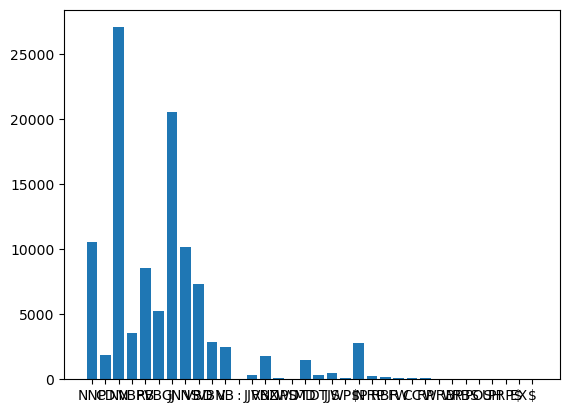

Average Sentiment Score: -3.0044660982541615e-05
Overall Text Sentiment: negative


In [12]:
import nltk
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import string
from nltk import pos_tag
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
import re
nltk.download('punkt') 
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
# Read the Moby Dick file from the Gutenberg dataset
moby_dick = gutenberg.raw('melville-moby_dick.txt')
tokens = word_tokenize(moby_dick)
tokens = [word for word in tokens if word not in string.punctuation]
# remove tokens like '--', '''','``','s''3
tokens = [token for token in tokens if not re.match(r"[-'`]|s''\d", token)]
stop_words = set(stopwords.words('english'))
filtered_tokens = [w for w in tokens if not w in stop_words]
filtered_tokens = [w for w in filtered_tokens if w.lower() not in stop_words]
pos_tagged_tokens = pos_tag(filtered_tokens)
pos_tags = [tag for _, tag in pos_tagged_tokens]
pos_freq = Counter(pos_tags)
top_five_pos = pos_freq.most_common(5)
for pos, freq in top_five_pos:
    print(f"{pos}: {freq}")
pos_tag_mapping = {
    'NNS': 'n',  # Noun, plural
    'VBG': 'v',  # Verb, gerund or present participle
    'NN': 'n',   # Noun, singular or mass
    'VBD': 'v',  # Verb, past tense
    'VBN': 'v',  # Verb, past participle
    'JJ': 'a',   # Adjective
    'VBZ': 'v',  # Verb, 3rd person singular present
    'VBP': 'v',  # Verb, non-3rd person singular present
    'RB': 'r',   # Adverb
    'NNP': 'n',  # Proper noun, singular
    'VB': 'v',   # Verb, base form
    'IN': 'n',   # Preposition or subordinating conjunction
    'PRP': 'n',  # Personal pronoun
    'PRP$': 'n', # Possessive pronoun
    'JJR': 'a',  # Adjective, comparative
    'JJS': 'a',  # Adjective, superlative
    'CD': 'n',   # Cardinal number
    'MD': 'v',   # Modal
    'VBG': 'v',  # Verb, gerund or present participle
    'RBR': 'r',  # Adverb, comparative
    'RBS': 'r',  # Adverb, superlative
    'WP': 'n',   # Wh-pronoun
    'WRB': 'r',  # Wh-adverb
}

# Assuming you have already defined 'pos_tagged_tokens' list

# Extract the top 20 tokens
top_20_tokens = Counter(pos_tagged_tokens).most_common(20)

# Create a lemmatizer instance
lemmatizer = WordNetLemmatizer()

# Lemmatize the top 20 tokens and remove punctuation
lemmatized_tokens = [lemmatizer.lemmatize(token, pos=pos_tag_mapping[pos]) for (token, pos), count in top_20_tokens if pos in pos_tag_mapping and not all(char in string.punctuation for char in token)]

# Print the lemmatized tokens
print(top_20_tokens)
print(lemmatized_tokens)
plt.bar(pos_freq.keys(), pos_freq.values())
plt.show()
sia = SentimentIntensityAnalyzer()
sentence = sent_tokenize(moby_dick)
for i in sentence:
    score = 0
    score += sia.polarity_scores(i)['compound']
avg_score = score / len(sentence)
if avg_score > 0.05:
    overall_sentiment = 'positive'
else:
    overall_sentiment = 'negative'
print("Average Sentiment Score:", avg_score)
print("Overall Text Sentiment:", overall_sentiment)


